# tf.data api!!!!

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [ ]:
data, info = tfds.load("mnist", with_info = True)# t로 해야 info를 불러올 수 있음 꼭 불러오삼!!!
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [ ]:
# 보면 splits랑 features 보면 됨
train_data, test_data = data["train"], data["test"]

# tf.data 모듈

굉장히 좋다!!!

1.생성
from_tensor_slices : 개별 혹은 여러개 넘파이를 받고 배치를 지원하는 기능

from_tensors : 배치를 지원하지 않고 그냥 tensor로 

from_generator() : 생성자 함수에서 입력을취함

-> 이거로 만들어지는 것은 다 데이터셋 객체임


<br><br><br>
2.변함
batch
repeat : 데이터 복제
shuffle : 섞

map : 데이터에 함수를 적용하는 거니 데이터셋.map 이런게 되지 원래 파이썬이랑 다른 거임

filter : 데이터 거르기하때 사용

<br><br><br>

3.반복
iterator.get_next()로 다음 배치로 이동할 수 있게 해줌

-> 변함과 반복을 하려면 데이터 셋 객체를 생성 해줘야함

# 시작~~~!

### from tensor slices : 하나 혹은 다중 넘파이 데이터를 가져올 수 있음

```
하나 받으면 for문에서 하나만 리턴하고 두개받으면 두개리턴함 from 텐서 슬라이스와 for문은세트다!!
```

In [ ]:
import numpy as np
num_items = 20
num_list = np.arange(num_items)

In [ ]:
# 객체 정보가 텐서슬라이스 데이터셋이다.
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)
num_list_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
for item in num_list_dataset.take(1):
  print(item)

tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


#### from_generator()

해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능

output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야함

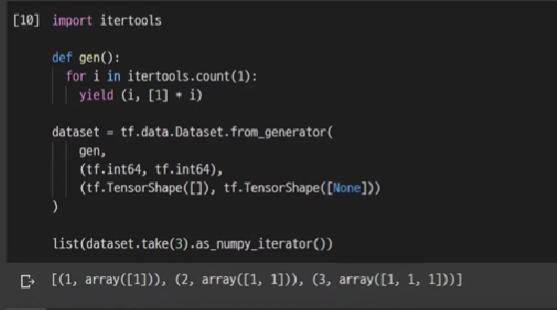

-> 너무 어려워서 쓸때 배우자하하하

#### batch, repeat

batch : 배치 사이즈 크기로 나눔

리핏 : 반복함

In [ ]:
dataset = num_list_dataset.repeat(3).batch(7)

In [ ]:
# 7개로 3번 반복해서 수행
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [ ]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True) # 남는거 짤라서 3/ 3/ 2로 반복됨
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


#### map, filter
전처리단계에서 시행하여 원하지 않는 데이터 거름

-> 이거 두개를 진짜 많이 쓰는 거 같아서 잘 알아야한다. 

In [ ]:
from tensorflow.data import Dataset

In [ ]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x*2) # 데이터셋.map을 하네 -> 데이터셋에 map 함수의 인자인 함수의 매개변수로 데이터셋을 넣는다는 의미
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [ ]:
def gob(dataset):
  return dataset * 2

dataset = Dataset.range(1, 6)
dataset = dataset.map(gob) # 데이터셋.map을 하네 -> 데이터셋에 map 함수의 인자인 함수의 매개변수로 데이터셋을 넣는다는 의미
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [ ]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4,5, 6, 7, 8, 9, 10])
dataset = dataset.filter(lambda x: x!=5) # 데이터셋.filter를 하네 -> 데이터셋에 filter 함수의 인자인 함수의 매개변수로 넣는다는 의미
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 6, 7, 8, 9, 10]

#### shuffle, take

셔플하면 가져올 때마다 다른 데이터 가져옴

In [ ]:
# batch를 했으면 가져와도 batch로 가져오는 것이라서 배치가 2면 take2하면 4개를 가져오는 것이다.
data2, info = tfds.load("imdb_reviews", with_info = True) # t로 해야 info를 불러올 수 있음 꼭 불러오삼!!!
train_dataset = data2["train"]

train_dataset = train_dataset.batch(5).shuffle(5).take(2)
for data in train_dataset:
  print(data) # 결과에 b가 배치구나!!!

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMIH3JC/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMIH3JC/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMIH3JC/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
{'label': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 1, 1, 0])>, 'text': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'It was disgusting and painful. What a waste of a cast! I swear, the audience (1/2 full) laughed TWICE in 90 minutes. This is not a lie. Do not even rent it.<br /><br />Zeta Jones was just too mean to be believable.<br /><br />Cusack was OK. Just OK. I felt sorry for him (the actor) in case people remember this mess.<br /><br />Roberts was the same as she always is. Charming and sweet, but with no purpose. The "romance" with John was completely unbelievable.',
       b'This is a straight-to-video movie, so it should go without saying that it\'s not going to rival the first Lion King, but that said, this was downright good.<br /><br />My kids loved this, but that\'s a given, they love anything that\'s a cartoon. 

In [ ]:
# 데이터 셋 객체를 이터레이터로 만들면 next next로 가져올 수 있음

dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


## 자동 미분과 그래프 함수와 데이터 셋 객체를 사용한 훈련

-> 결론적으로 tfdataset 객체로 만들면 그래프와 자동 미분을 할 수 있다.

-> ★ 찐 고수로 가는 길

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, Dropout, Activation, BatchNormalization 
from tensorflow.keras import Model

In [13]:
# 1. MNIST 데이터셋 임포트
(X_train, y_train), (X_test, y_test) = load_data()

X_train,X_val, y_train,y_val = train_test_split(X_train, y_train, 
                                                test_size = 0.3,
                                                random_state = 111)

In [4]:
# 이거 하고 안하고는 상관 없음
X_train = X_train / 255.
X_test = X_test / 255.

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32)

In [30]:
# network and training
EPOCHS = 2
BATCH_SIZE = 20
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128 # 은닉층 개수?
VALIDATION_SPLIT=0.2

In [31]:
#build the model

DROPOUT = 0.3
RESHAPED = 784

#build the model

DROPOUT = 0.3
RESHAPED = 784

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28))) # 이거 내가 추가함 ㅎㅎ
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='sigmoid'))

In [22]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

#### 이것들 loss.result하면 loss와 accuracy 결과를 얻을 수 있어서 나중에 epoch 찍을 때 씀

In [23]:
train_loss = tf.keras.metrics.Mean(name = "train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "train_accuracy")

test_loss = tf.keras.metrics.Mean(name = "test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "test_accuracy")

#### 그래프를 사용하여 학습하면 속도가 빠름

이건 걍 틀을 외우는 게 좋을듯?? 모든 이런 코드를 알아볼 수 있을 정도로 달달

```
-> 이게 스탭마다 반복적으로 계산하는 역할을 함
```

In [24]:
@tf.function
def train_step(image, labels):
  with tf.GradientTape() as tape:
    predictions = model(image) # 모델 출력이 예측이다.
    loss = loss_obj(labels, predictions) # 이러면 차이까지

  gradients = tape.gradient(loss, model.trainable_variables) # loss랑 v 넣어주고
  optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # 이렇게 넣어주고

  train_loss(loss)
  train_accuracy(labels, predictions)

In [25]:
@tf.function
def test_step(image, labels):
    predictions = model(image) # 모델 출력이 예측이다.
    loss = loss_obj(labels, predictions) # 이러면 차이까지

    test_loss(loss)
    test_accuracy(labels, predictions)

```
오류 1 : loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()가 sparse카테고리컬인데 모델 마지막단 dense1로해서 안 맞음 ㄷㄷ 그래서 10으로 바꿔줌 -> 와 진짜 이런거 맞춰야하는 구나
```

In [36]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_dataset: # for i in train_dataset:과 같은 건데 tensor slice에 데이터와 라벨을 넣었으니 리턴이 2개!!!
    train_step(images, labels)

  for test_imgaes, test_labels in test_dataset:
    test_step(test_imgaes, test_labels)

  template = "Epochs: {:3d}\tLoss: {:.4f}\tAccuracy:{:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1,
                        train_loss.result()*100, 
                        train_accuracy.result()*100,
                        test_loss.result(), 
                        test_accuracy.result()*100))

Epochs:   1	Loss: 29.7896	Accuracy:96.6403	Test Loss: 0.3183	Test Accuracy: 95.2530	
Epochs:   2	Loss: 28.8060	Accuracy:96.7220	Test Loss: 0.3155	Test Accuracy: 95.3071	
Epochs:   3	Loss: 27.9020	Accuracy:96.7951	Test Loss: 0.3132	Test Accuracy: 95.3476	
Epochs:   4	Loss: 27.0248	Accuracy:96.8725	Test Loss: 0.3121	Test Accuracy: 95.3839	
Epochs:   5	Loss: 26.2143	Accuracy:96.9436	Test Loss: 0.3120	Test Accuracy: 95.4126	
Epochs:   6	Loss: 25.4412	Accuracy:97.0153	Test Loss: 0.3111	Test Accuracy: 95.4454	
Epochs:   7	Loss: 24.7285	Accuracy:97.0773	Test Loss: 0.3113	Test Accuracy: 95.4610	
Epochs:   8	Loss: 24.0555	Accuracy:97.1388	Test Loss: 0.3100	Test Accuracy: 95.4960	
Epochs:   9	Loss: 23.4161	Accuracy:97.1979	Test Loss: 0.3094	Test Accuracy: 95.5310	
Epochs:  10	Loss: 22.8264	Accuracy:97.2519	Test Loss: 0.3093	Test Accuracy: 95.5634	
Epochs:  11	Loss: 22.2430	Accuracy:97.3086	Test Loss: 0.3087	Test Accuracy: 95.5982	
Epochs:  12	Loss: 21.7012	Accuracy:97.3628	Test Loss: 0.3092	Test

### sketch2fashion의 학습법과 비교해보자